In [42]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random
from collections import Counter
from os import system,remove 
from scipy.stats import skew
from scipy.stats import kurtosis
from glob import glob
import asyncio
import threading
from os import system,remove 
import seaborn as sn
from sklearn.decomposition import PCA

In [37]:
linear_size='32'
beta=0.3462
field=-0.3

system(f'nice -n +20 ./ising_mc_cov --linear_size={linear_size} --beta={beta} --field={field}')

linear size = 32 beta=0.3462 field = -0.3
set up system
mc step start
mc step end
total covariance end
sub covariance end
save sub data
save total data


0

In [38]:

filenumber=np.arange(18)
sub_covlist=[]

filename=f'selection_mc/cov/statics_l{linear_size}Beta{beta:.04g}h{field:.04g}.h5'
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    total_cov=f['total_covariance'][()]
for i in filenumber:
    filename=f'selection_mc/cov/subsample_l{linear_size}Beta{beta:.04g}h{field:.04g}_{i:.04g}.h5'
    with h5py.File(filename, "r") as f:
        sub_covlist.append(f['covariance'][()])

Keys: <KeysViewHDF5 ['total_covariance']>


In [21]:
print(len(total_cov))

1048576


In [22]:
print(32*32*32*32)

1048576


4096


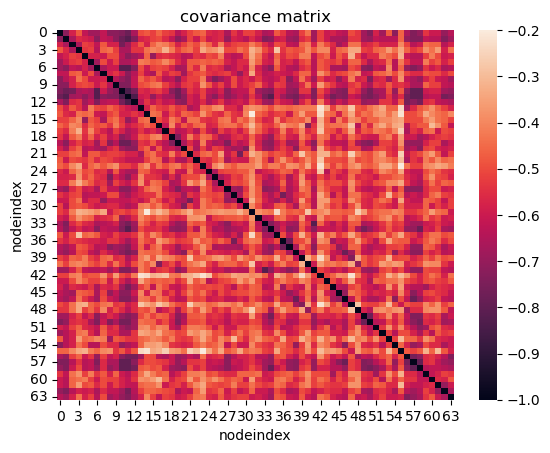

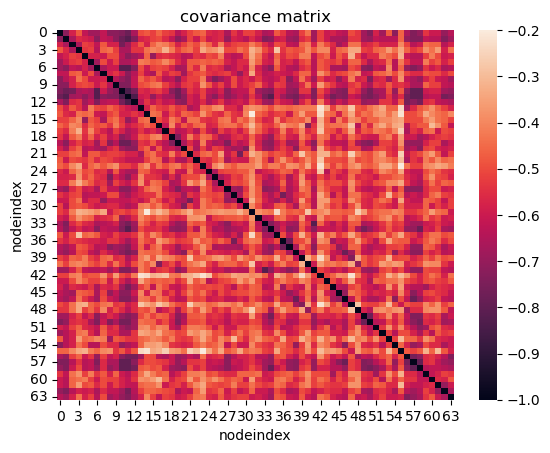

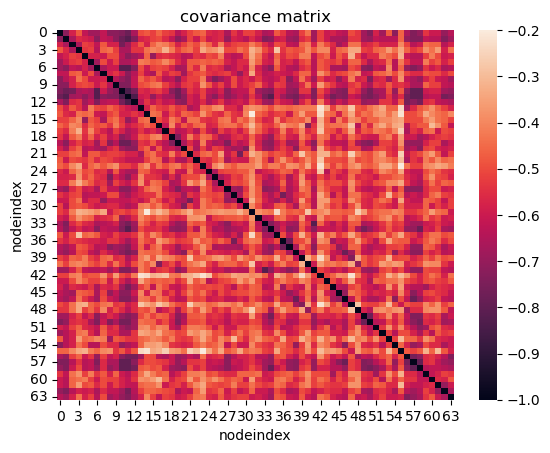

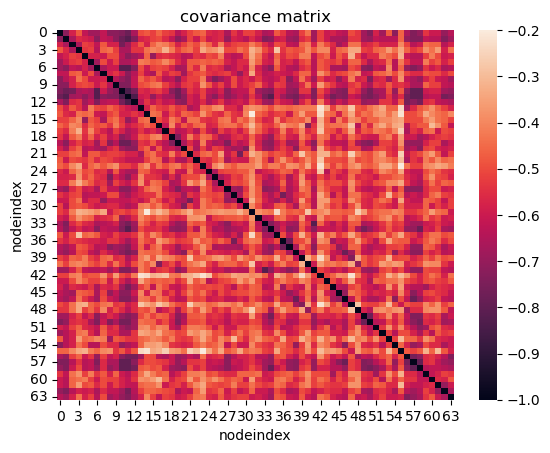

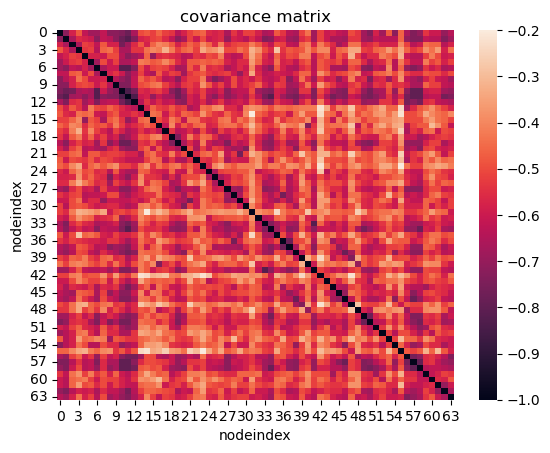

<Figure size 640x480 with 0 Axes>

In [57]:
print(len(sub_covlist[0]))
for i in range(5):
    cov_2D=np.array(sub_covlist[0]).reshape(64,64)
    sn.heatmap(cov_2D)
    plt.title('covariance matrix')
    plt.xlabel('nodeindex')
    plt.ylabel('nodeindex')
    plt.figure()


<Axes: >

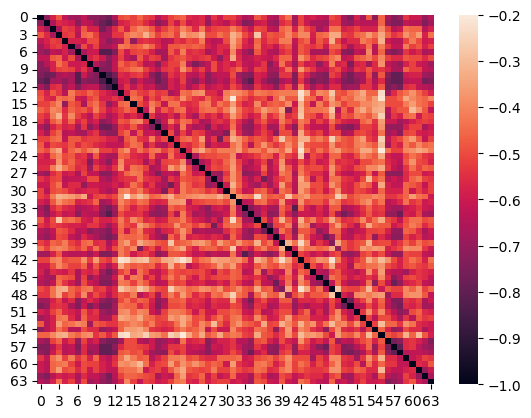

<Figure size 640x480 with 0 Axes>

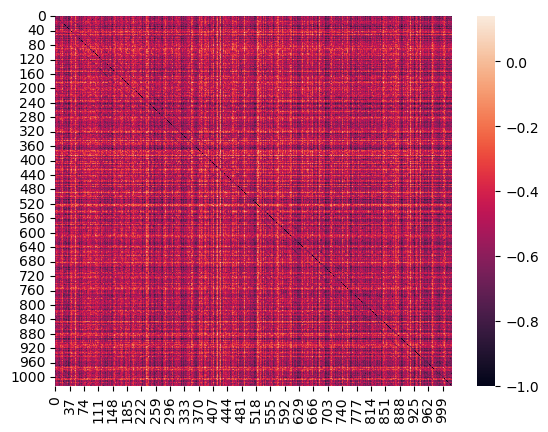

<Figure size 640x480 with 0 Axes>

In [39]:
total_cov_2D=np.array(total_cov).reshape(32*32,32*32)
sn.heatmap(total_cov_2D)
plt.figure()




In [48]:
pca=PCA(n_components=64)
cov_2D=np.array(sub_covlist[0]).reshape(64,64)
new_X=pca.fit_transform(cov_2D)

print(new_X)
print(pca.explained_variance_ratio_)



[[ 4.82172350e-01  1.92027997e-01  6.73055432e-02 ... -2.16344095e-03
  -9.40044132e-04  3.21600839e-16]
 [ 7.27935315e-01  8.45781589e-02 -1.13530547e-02 ...  1.46244730e-03
  -5.82924173e-04  3.21600839e-16]
 [-3.47399460e-02  1.66337660e-01 -6.15351096e-02 ...  4.17334741e-04
  -2.04154905e-03  3.21600839e-16]
 ...
 [-2.48886685e-01  7.13460572e-02  1.56453459e-01 ...  4.12025384e-03
   4.96104408e-04  3.21600839e-16]
 [ 3.29041973e-01  1.26583399e-01  3.68684738e-02 ...  5.06751457e-05
   4.41237718e-04  3.21600839e-16]
 [ 2.55816566e-01  2.03099236e-02  1.43771851e-01 ... -5.94533659e-03
   1.78879317e-04  3.21600839e-16]]
[3.69235865e-01 1.28865190e-01 7.30661100e-02 5.03503033e-02
 4.61680006e-02 4.25157515e-02 3.63473054e-02 3.25228444e-02
 2.75420737e-02 2.64353944e-02 1.92527480e-02 1.52334386e-02
 1.39496153e-02 1.23798465e-02 1.14057794e-02 9.80175105e-03
 8.87121388e-03 8.34303944e-03 7.53028144e-03 6.42515568e-03
 5.45806724e-03 5.14776050e-03 4.52665523e-03 3.92584945e-0

Text(0, 0.5, 'Eigenvalue')

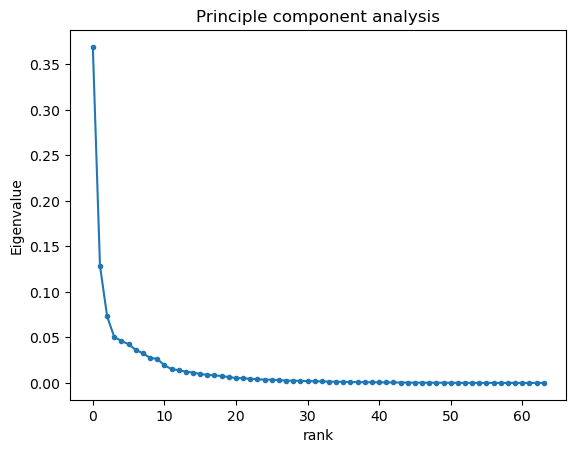

In [58]:
plt.plot(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_,'.-')
plt.title('Principle component analysis')
plt.xlabel('rank')
plt.ylabel('Eigenvalue')
# plt.yscale('log')